<a href="https://colab.research.google.com/github/MuhammadNoman2/Project/blob/main/Diabetes%20Prediction%20using%20hybrid_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [392]:
# Step 1: Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split,RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.impute import KNNImputer
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report ,accuracy_score, precision_score, recall_score, f1_score, roc_auc_score,roc_curve,auc
import joblib
import warnings
warnings.simplefilter(action = "ignore")

In [2]:
df_copy = pd.read_csv('Diabetes Health Tracer.csv')

In [3]:
df_copy.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,0.0,33.6,0.627,50,1
1,1,85.0,66.0,29.0,0.0,26.6,0.351,31,0
2,8,183.0,64.0,0.0,0.0,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [4]:
df_copy.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
2872,3,187.2,79.0,9.4,170.30719,26.899430,NaN,36,1
2873,2,149.4,82.0,9.8,158.69250,28.554780,NaN,44,1
2874,1,163.8,84.0,6.5,182.61160,31.000062,NaN,52,1
2875,4,167.4,86.0,11.7,166.97762,29.457447,NaN,54,1
2876,2,171.0,78.0,10.8,153.66408,31.037804,NaN,56,1


In [5]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2877 entries, 0 to 2876
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               2877 non-null   int64  
 1   Glucose                   2877 non-null   float64
 2   BloodPressure             2877 non-null   float64
 3   SkinThickness             2877 non-null   float64
 4   Insulin                   2877 non-null   float64
 5   BMI                       2877 non-null   float64
 6   DiabetesPedigreeFunction  2768 non-null   float64
 7   Age                       2877 non-null   int64  
 8   Outcome                   2877 non-null   int64  
dtypes: float64(6), int64(3)
memory usage: 202.4 KB


In [6]:
df_copy.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,2877.000000,2877.000000,2877.000000,2877.000000,2877.000000,2877.000000,2768.000000,2877.000000,2877.000000
mean,3.654501,120.560514,69.523775,20.443969,81.940165,31.843919,0.471193,33.044838,0.338895
std,3.312354,32.494640,19.136999,15.894525,110.942224,8.187042,0.325669,11.979166,0.473416
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,18.000000,0.000000
25%,1.000000,98.000000,64.000000,0.000000,0.000000,26.800000,0.244000,24.000000,0.000000
50%,3.000000,116.000000,72.000000,22.000000,48.000000,32.000000,0.375000,29.000000,0.000000
75%,6.000000,141.000000,80.000000,32.000000,132.000000,36.500000,0.624000,40.000000,1.000000
max,17.000000,239.400000,122.000000,110.000000,846.000000,80.600000,2.420000,81.000000,1.000000


In [7]:
print("Number of Rows = ",df_copy.shape[0])
print("Number of Columns = ",df_copy.shape[1])

Number of Rows =  2877
Number of Columns =  9


In [8]:
df_copy.Outcome.value_counts()

Outcome
0    1902
1     975
Name: count, dtype: int64

<Figure size 2000x300 with 0 Axes>

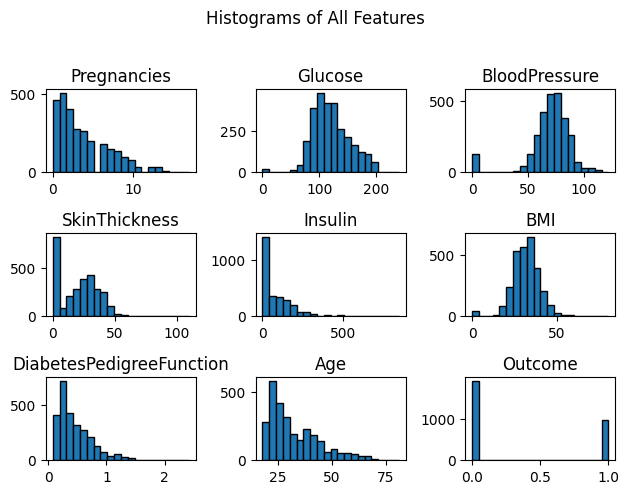

In [9]:
plt.figure(figsize=(20, 3))
df_copy.hist(bins=20, edgecolor='black', grid=False)
plt.suptitle('Histograms of All Features', y=1.02)
plt.tight_layout()
plt.show()



In [10]:
df_copy.isnull().sum()

Pregnancies                   0
Glucose                       0
BloodPressure                 0
SkinThickness                 0
Insulin                       0
BMI                           0
DiabetesPedigreeFunction    109
Age                           0
Outcome                       0
dtype: int64

In [12]:
df_copy[['Glucose','SkinThickness','Insulin','BMI']] = df_copy[['Glucose','SkinThickness','Insulin','BMI']].replace(0,np.NaN)

In [13]:
df_copy.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [14]:
df_copy.isnull().sum()

Pregnancies                    0
Glucose                       18
BloodPressure                  0
SkinThickness                800
Insulin                     1330
BMI                           39
DiabetesPedigreeFunction     109
Age                            0
Outcome                        0
dtype: int64

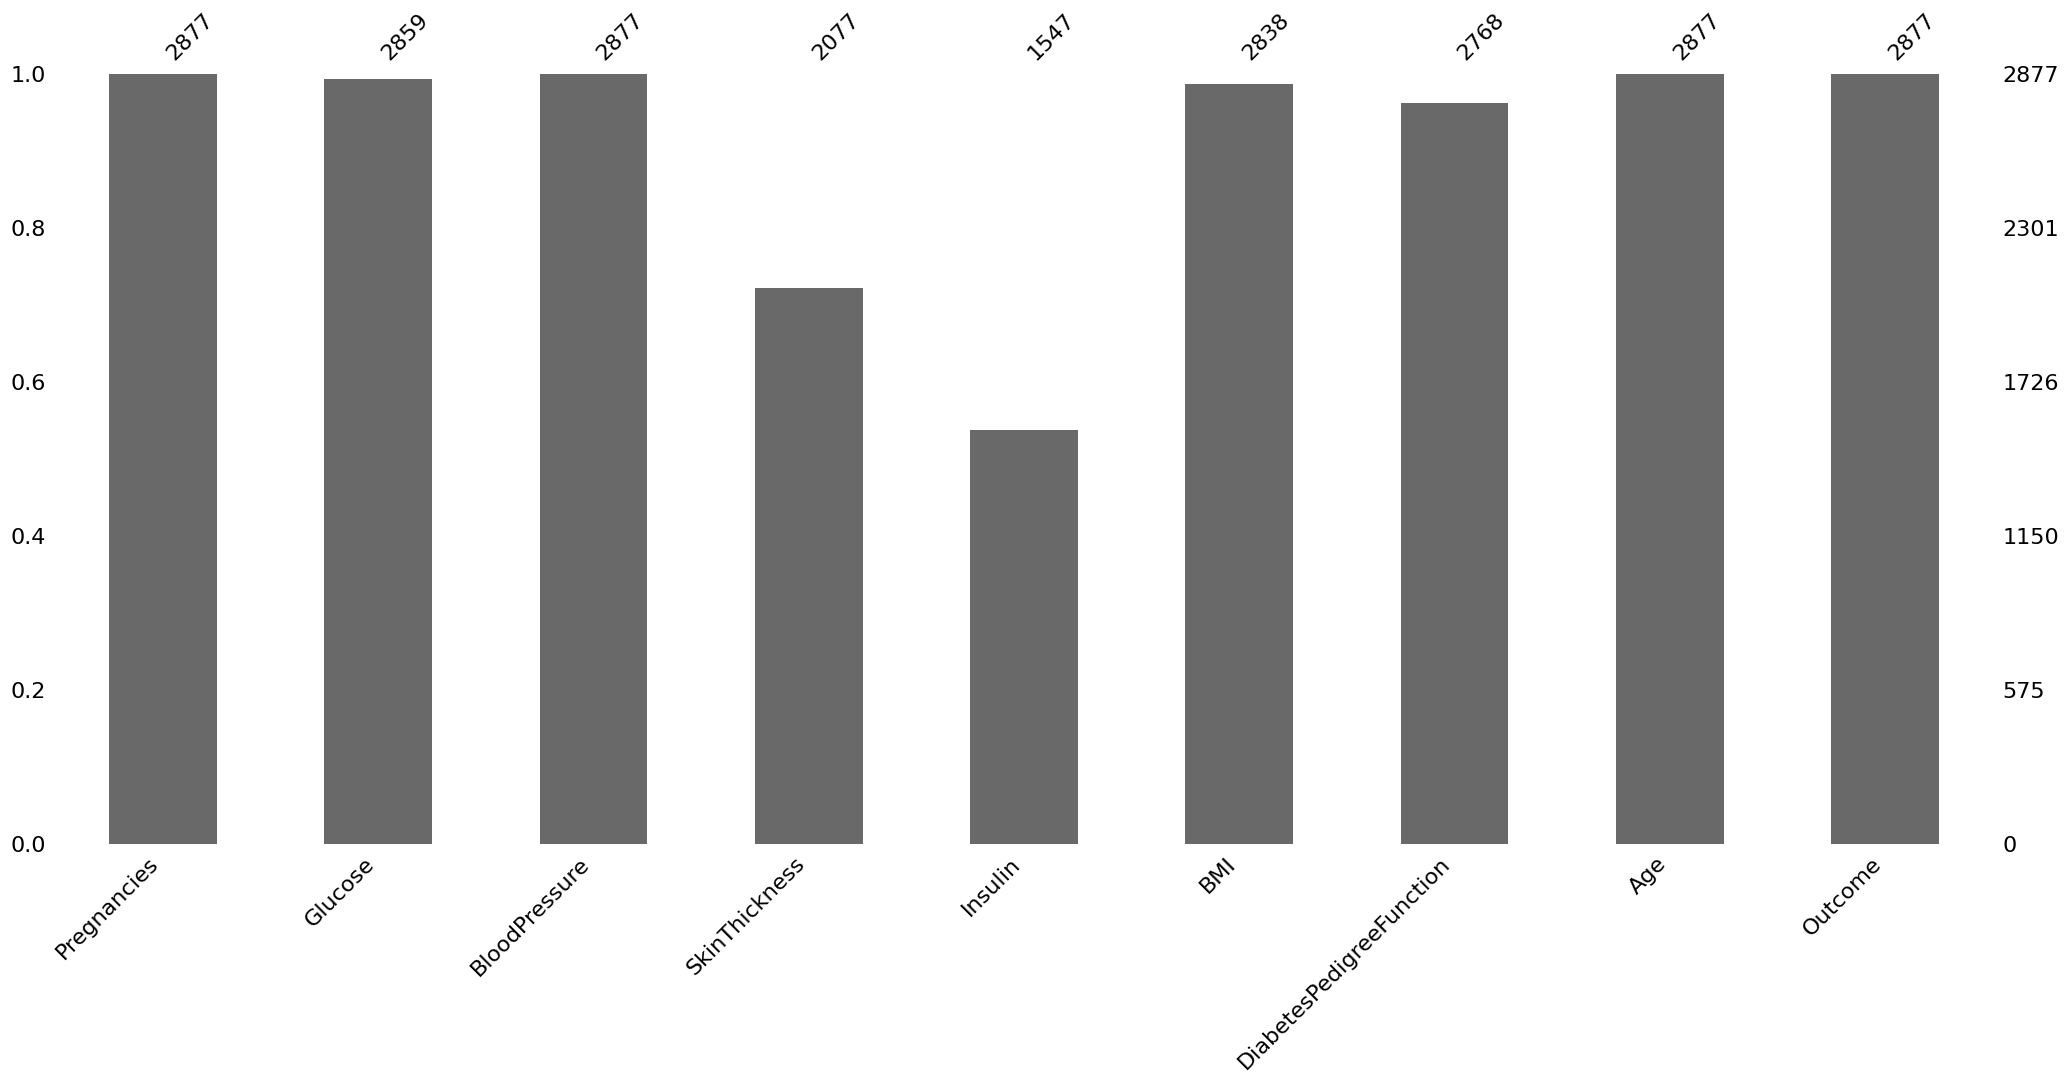

In [15]:
# Plotting
import missingno as msno
msno.bar(df_copy);

In [16]:
def median_target(var):
    temp = df_copy[df_copy[var].notnull()]
    temp = temp[[var, 'Outcome']].groupby(['Outcome'])[[var]].median().reset_index()
    return temp

In [17]:
columns = df_copy.columns
columns = columns.drop("Outcome")
for i in columns:
    median_target(i)
    df_copy.loc[(df_copy['Outcome'] == 0 ) & (df_copy[i].isnull()), i] = median_target(i)[i][0]
    df_copy.loc[(df_copy['Outcome'] == 1 ) & (df_copy[i].isnull()), i] = median_target(i)[i][1]

In [18]:
df_copy.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

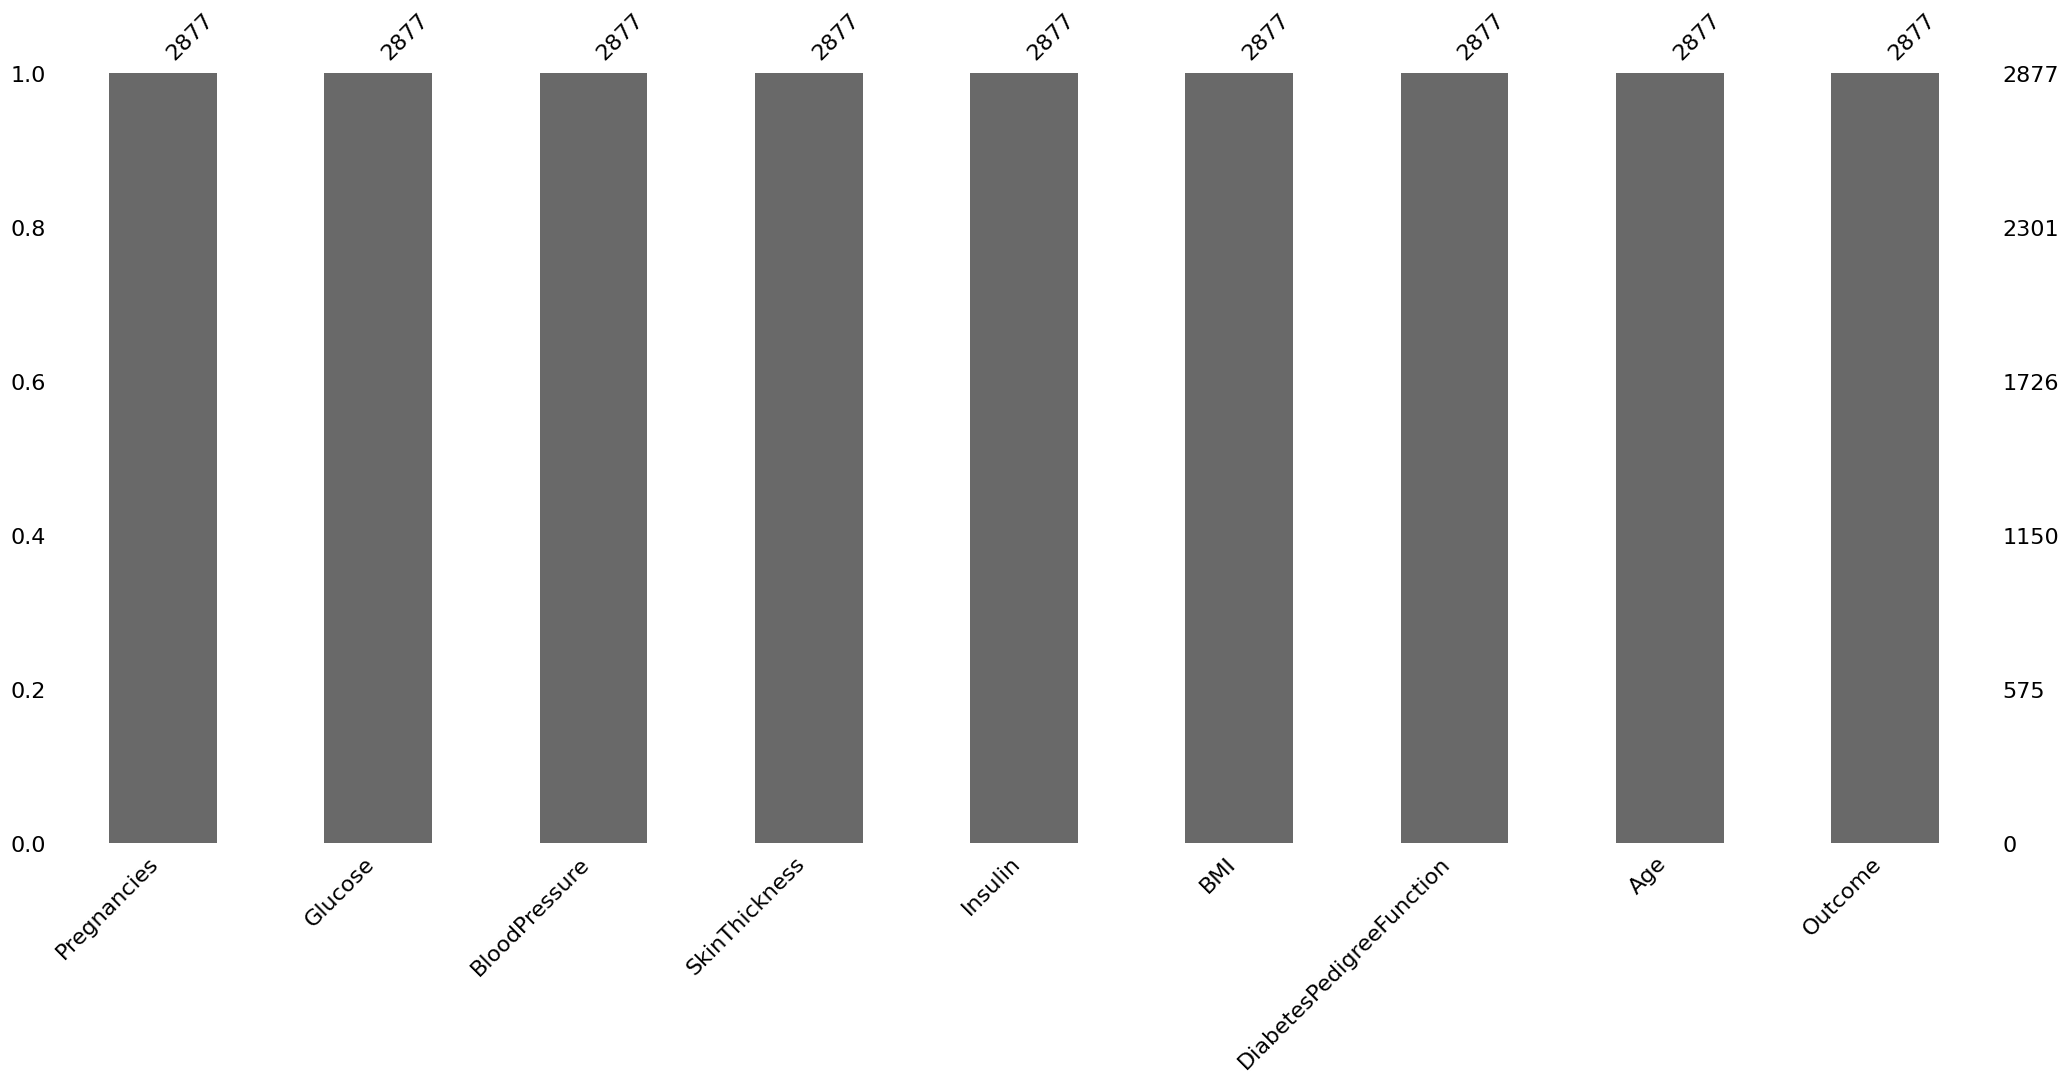

In [19]:
# Plotting
import missingno as msno
msno.bar(df_copy);

In [20]:

for feature in df_copy.columns:
    Q1 = df_copy[feature].quantile(0.25)
    Q3 = df_copy[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    outliers = df_copy[(df_copy[feature] > upper) | (df_copy[feature] < lower)]

    if not outliers.empty:
        print(f"{feature}: yes")

    else:
        print(f"{feature}: no")

Pregnancies: yes
Glucose: yes
BloodPressure: yes
SkinThickness: yes
Insulin: yes
BMI: yes
DiabetesPedigreeFunction: yes
Age: yes
Outcome: no


<Axes: xlabel='BloodPressure'>

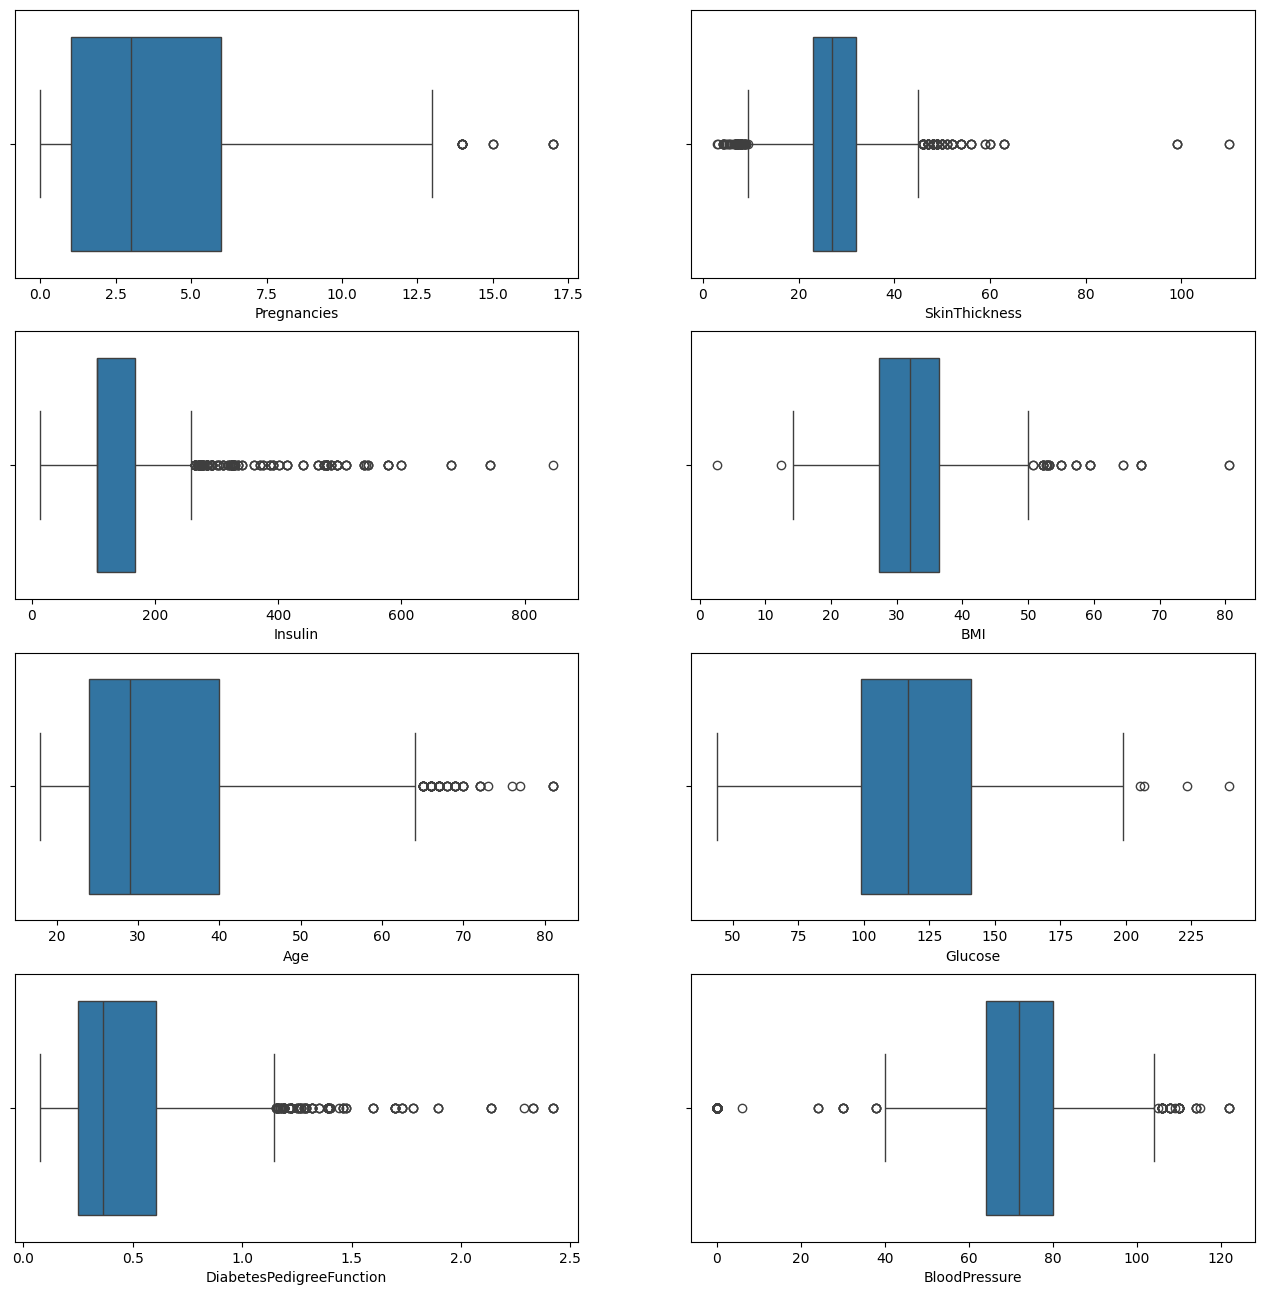

In [21]:
fig, ax = plt.subplots(4,2, figsize=(16,16))
sns.boxplot(x = df_copy['Pregnancies'], ax=ax[0,0])
sns.boxplot(x = df_copy['SkinThickness'], ax=ax[0,1])
sns.boxplot(x = df_copy['Insulin'], ax=ax[1,0])
sns.boxplot(x = df_copy['BMI'], ax=ax[1,1])
sns.boxplot(x = df_copy['Age'], ax=ax[2,0])
sns.boxplot(x = df_copy['Glucose'], ax=ax[2,1])
sns.boxplot(x = df_copy['DiabetesPedigreeFunction'], ax=ax[3,0])
sns.boxplot(x = df_copy['BloodPressure'], ax=ax[3,1])


In [22]:
Q1 = df_copy.Insulin.quantile(0.25)
Q3 = df_copy.Insulin.quantile(0.75)
IQR = Q3-Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR
df_copy.loc[df_copy["Insulin"] > upper,"Insulin"] = upper

In [23]:
Q1 = df_copy.BMI.quantile(0.25)
Q3 = df_copy.BMI.quantile(0.75)
IQR = Q3-Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR
df_copy.loc[df_copy["BMI"] > upper,"BMI"] = upper

In [24]:
Q1 = df_copy.Age.quantile(0.25)
Q3 = df_copy.Age.quantile(0.75)
IQR = Q3-Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR
df_copy.loc[df_copy["Age"] > upper,"Age"] = upper

In [25]:
Q1 = df_copy.SkinThickness.quantile(0.25)
Q3 = df_copy.SkinThickness.quantile(0.75)
IQR = Q3-Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR
df_copy.loc[df_copy["SkinThickness"] > upper,"SkinThickness"] = upper

In [26]:
Q1 = df_copy.Pregnancies.quantile(0.25)
Q3 = df_copy.Pregnancies.quantile(0.75)
IQR = Q3-Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR
df_copy.loc[df_copy["Pregnancies"] > upper,"Pregnancies"] = upper

In [27]:
Q1 = df_copy.BloodPressure.quantile(0.25)
Q3 = df_copy.BloodPressure.quantile(0.75)
IQR = Q3-Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR
df_copy.loc[df_copy["BloodPressure"] > upper,"BloodPressure"] = upper

In [28]:
Q1 = df_copy.Glucose.quantile(0.25)
Q3 = df_copy.Glucose.quantile(0.75)
IQR = Q3-Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR
df_copy.loc[df_copy["Glucose"] > upper,"Glucose"] = upper

In [29]:
Q1 = df_copy.DiabetesPedigreeFunction.quantile(0.25)
Q3 = df_copy.DiabetesPedigreeFunction.quantile(0.75)
IQR = Q3-Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR
df_copy.loc[df_copy["DiabetesPedigreeFunction"] > upper,"DiabetesPedigreeFunction"] = upper

In [30]:
 #We determine outliers between all variables with the LOF method
#from sklearn.neighbors import LocalOutlierFactor
#lof =LocalOutlierFactor(n_neighbors= 10)
#lof.fit_predict(df)


In [31]:
#df_scores = lof.negative_outlier_factor_
#np.sort(df_scores)[0:30]

In [32]:
#We choose the threshold value according to lof scores
#threshold = np.sort(df_scores)[7]
#threshold

In [33]:
#We delete those that are higher than the threshold
#outlier = df_scores > threshold
#df = df[outlier]

In [34]:
# The size of the data set was examined.
#df.shape

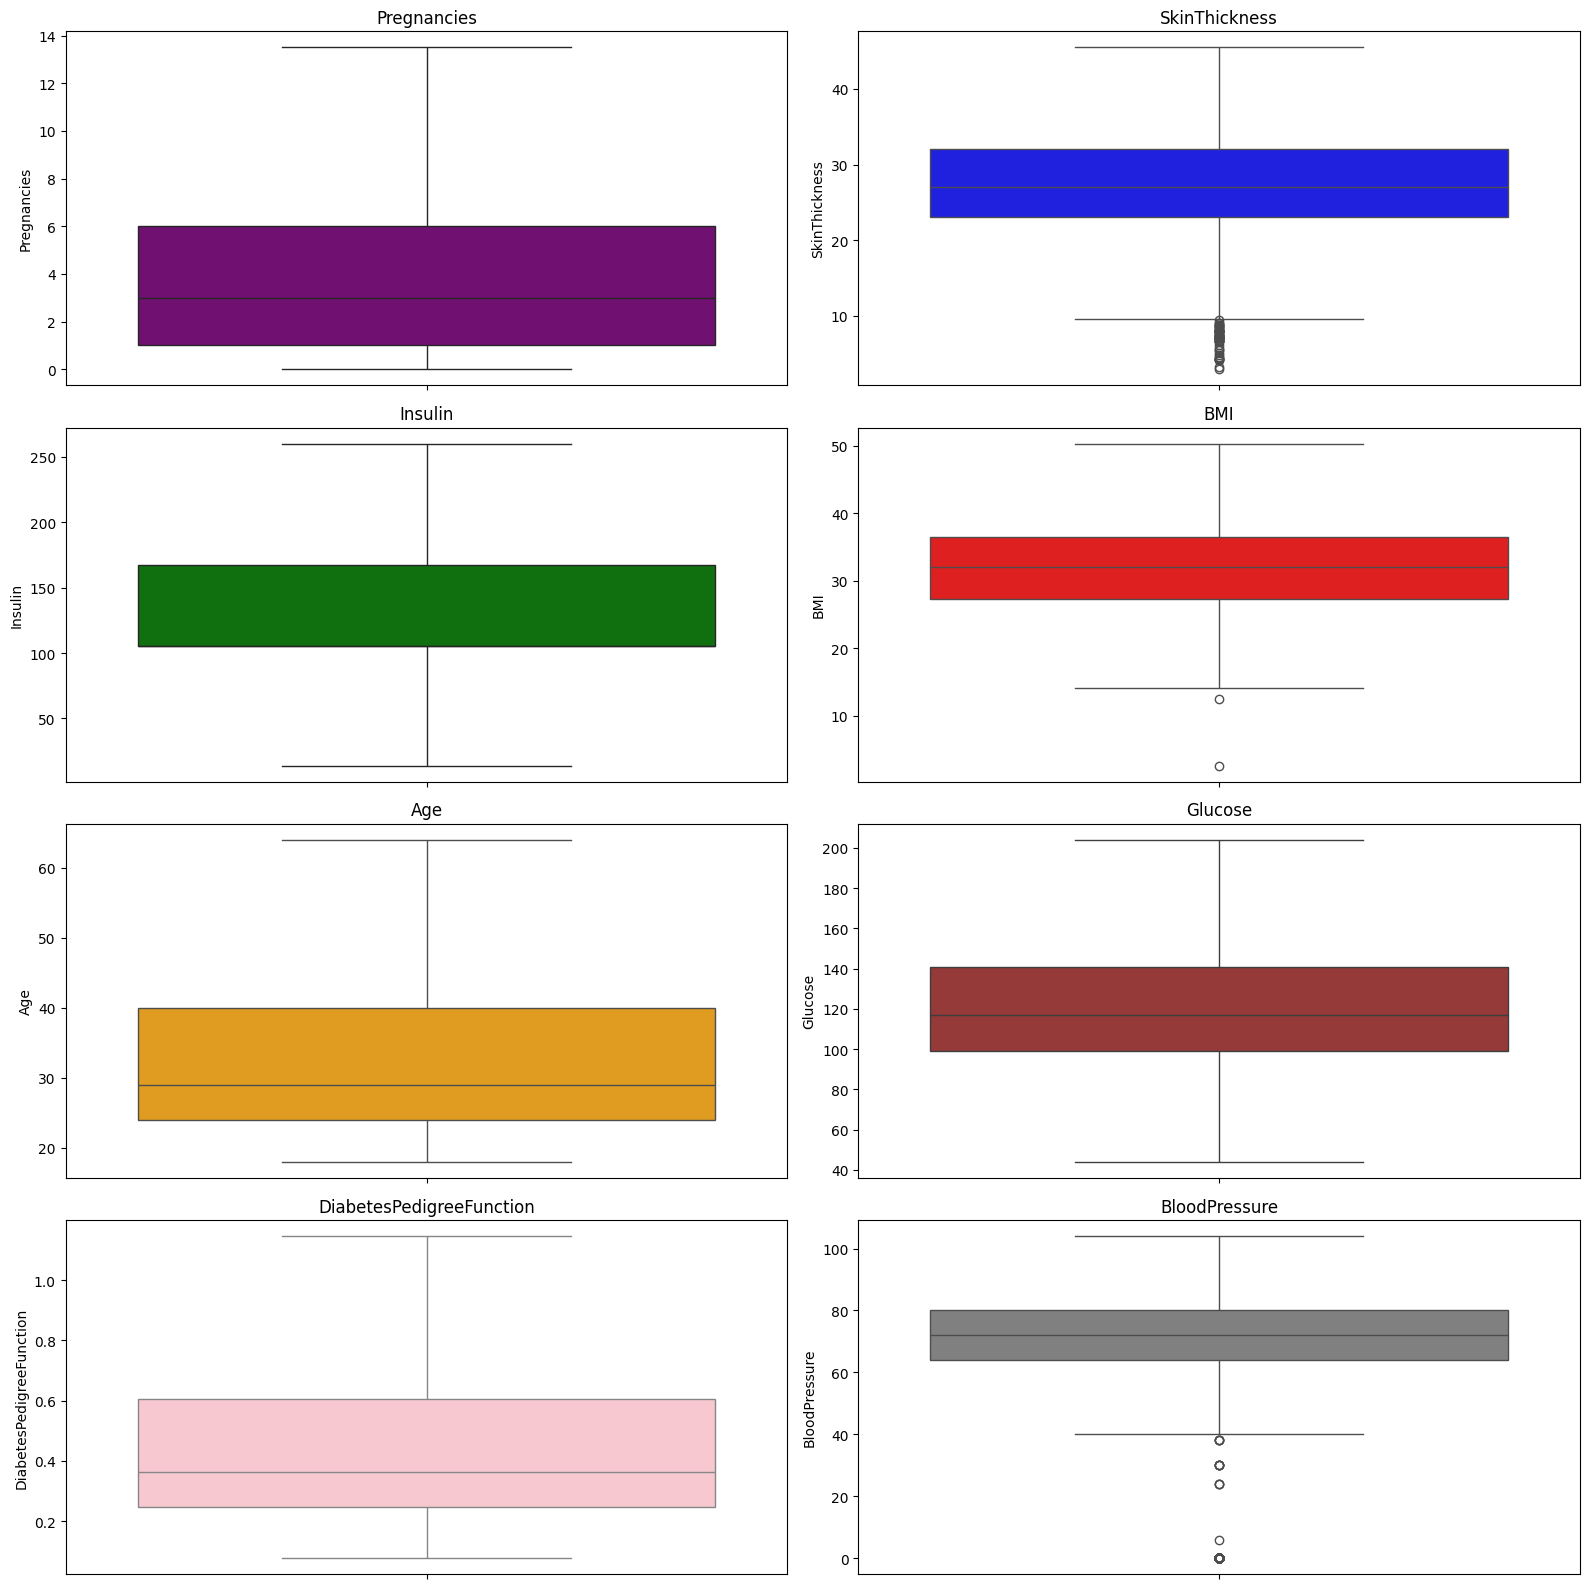

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df_copy is your DataFrame
fig, ax = plt.subplots(4, 2, figsize=(16, 16))  # Adjust figsize as needed

# Define colors for each boxplot
colors = ['purple', 'blue', 'green', 'red', 'orange', 'brown', 'pink', 'grey']

# Plot each boxplot with the specified color
sns.boxplot(y=df_copy['Pregnancies'], ax=ax[0, 0], color=colors[0])
sns.boxplot(y=df_copy['SkinThickness'], ax=ax[0, 1], color=colors[1])
sns.boxplot(y=df_copy['Insulin'], ax=ax[1, 0], color=colors[2])
sns.boxplot(y=df_copy['BMI'], ax=ax[1, 1], color=colors[3])
sns.boxplot(y=df_copy['Age'], ax=ax[2, 0], color=colors[4])
sns.boxplot(y=df_copy['Glucose'], ax=ax[2, 1], color=colors[5])
sns.boxplot(y=df_copy['DiabetesPedigreeFunction'], ax=ax[3, 0], color=colors[6])
sns.boxplot(y=df_copy['BloodPressure'], ax=ax[3, 1], color=colors[7])

# Set titles for each subplot for clarity
ax[0, 0].set_title('Pregnancies')
ax[0, 1].set_title('SkinThickness')
ax[1, 0].set_title('Insulin')
ax[1, 1].set_title('BMI')
ax[2, 0].set_title('Age')
ax[2, 1].set_title('Glucose')
ax[3, 0].set_title('DiabetesPedigreeFunction')
ax[3, 1].set_title('BloodPressure')

# Adjust layout to avoid overlap
plt.tight_layout()

# Show plot
plt.show()


In [36]:
X = df_copy.drop('Outcome' ,axis=1)
y = df_copy['Outcome']

In [37]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6.0,148.0,72.0,35.0,167.0,33.6,0.6270,50
1,1.0,85.0,66.0,29.0,105.0,26.6,0.3510,31
2,8.0,183.0,64.0,32.0,167.0,23.3,0.6720,32
3,1.0,89.0,66.0,23.0,94.0,28.1,0.1670,21
4,0.0,137.0,40.0,35.0,168.0,43.1,1.1455,33


In [38]:
scaler = MinMaxScaler()
X= pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

In [39]:
#joblib.dump(scaler, 'min_max_scaler.pkl')

In [40]:
#joblib.dump(X, 'Scaled_data.pkl')

In [41]:
#Scaled_data  = joblib.load('Scaled_data.pkl')

In [42]:
#Scaled_data.head()

In [43]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.444444,0.65000,0.692308,0.753521,0.621951,0.649803,0.514286,0.695652
1,0.074074,0.25625,0.634615,0.612676,0.369919,0.503014,0.255738,0.282609
2,0.592593,0.86875,0.615385,0.683099,0.621951,0.433813,0.556440,0.304348
3,0.074074,0.28125,0.634615,0.471831,0.325203,0.534468,0.083372,0.065217
4,0.000000,0.58125,0.384615,0.753521,0.626016,0.849017,1.000000,0.326087


In [44]:
# Apply SMOTE on the entire dataset
smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X, y)

In [45]:
y_smote.shape

(3804,)

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X_smote, y_smote, test_size=0.2, random_state=42)

# Machine Learning Models

#Training models with (Random search) hyper parameter tuning

In [453]:
models = {
    'RandomForest': (RandomForestClassifier(), {
    'n_estimators': [9],
    'max_features': ['auto'],
    'max_depth': [10] + [None],
    'min_samples_split': [18],
    'min_samples_leaf': [5],
    'bootstrap': [True, False]
    }),
    'SVM': (SVC(probability=True), {
         'C': [50],
         'gamma': ['scale'] + [0.01],
          'kernel': [ 'rbf']
    }),
    'KNN': (KNeighborsClassifier(), {
        'n_neighbors': [5],
        'weights': ['uniform'],
        'p': [1, 2] # 1 for Manhattan distance, 2 for Euclidean distance
    }),
    'GradientBoosting': (GradientBoostingClassifier(), {
         'n_estimators': [57],
          'learning_rate': [0.01],
          'max_depth': [7],
          'min_samples_leaf': [4],
          'subsample': [0.5],
    }),
    'DecisionTree': (DecisionTreeClassifier(), {
        'criterion': ['gini', 'entropy'],
        'splitter': ['best', 'random'],
        'max_depth': [10],
        'min_samples_split': [18],
        'min_samples_leaf': [5],
        'max_features': ['log2']
    })
}

In [454]:
results = {}

for name, (model, param_dist) in models.items():
    random_search = RandomizedSearchCV(estimator=model, param_distributions=param_dist, n_iter=100, cv=3, verbose=2, random_state=42, n_jobs=-1)
    random_search.fit(X_train, y_train)
    best_model = random_search.best_estimator_

    y_pred = best_model.predict(X_test)
    y_pred_prob = best_model.predict_proba(X_test)[:, 1]

    accuracy = accuracy_score(y_test, y_pred) * 100
    precision = precision_score(y_test, y_pred) * 100
    recall = recall_score(y_test, y_pred) * 100
    f1 = f1_score(y_test, y_pred) * 100

    fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
    roc_auc = auc(fpr, tpr)

    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

    results[name] = {
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1': f1,
        'fpr': fpr,
        'tpr': tpr,
        'roc_auc': roc_auc,
        'tn': tn,
        'fp': fp,
        'fn': fn,
        'tp': tp
    }



Fitting 3 folds for each of 4 candidates, totalling 12 fits
Fitting 3 folds for each of 2 candidates, totalling 6 fits
Fitting 3 folds for each of 2 candidates, totalling 6 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 4 candidates, totalling 12 fits


# Printing Testing accuracy of all base models

In [455]:
print("RandomForest Accuracy: ", results['RandomForest']['accuracy'])
print("SVM Accuracy: ", results['SVM']['accuracy'])
print("KNN Accuracy: ", results['KNN']['accuracy'])
print("GradientBoosting Accuracy: ", results['GradientBoosting']['accuracy'])
print("DecisionTree Accuracy: ", results['DecisionTree']['accuracy'])


RandomForest Accuracy:  97.76609724047306
SVM Accuracy:  95.00657030223391
KNN Accuracy:  95.13797634691196
GradientBoosting Accuracy:  96.58344283837057
DecisionTree Accuracy:  95.00657030223391


# Hybrid Model (Voting Classifier)

In [456]:
# Create the VotingClassifier with soft voting
#voting_clf = VotingClassifier(estimators=[(name, best_estimators[name]) for name in best_estimators.keys()], voting='soft')
#voting_clf.fit(X_train, y_train)


In [457]:
best_estimators = {}

for name, (model, param_dist) in models.items():
    random_search = RandomizedSearchCV(estimator=model, param_distributions=param_dist, n_iter=100, cv=3, verbose=2, random_state=42, n_jobs=-1)
    random_search.fit(X_train, y_train)
    best_estimators[name] = random_search.best_estimator_


Fitting 3 folds for each of 4 candidates, totalling 12 fits
Fitting 3 folds for each of 2 candidates, totalling 6 fits
Fitting 3 folds for each of 2 candidates, totalling 6 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 4 candidates, totalling 12 fits


# Tuning of Hybrid Model with Random Search CV

In [466]:

# Define hyperparameters for the VotingClassifier
voting_param_dist = {
    'voting': ['soft'],
    'weights': [None, [3, 3, 3, 5, 5]],  # Adjusted weights for improved accuracy
    'flatten_transform': [True, False],
    'n_jobs': [-1],
}


# Perform Randomized Search to find the best hyperparameters for VotingClassifier
random_search_voting = RandomizedSearchCV(VotingClassifier(estimators=[(name, best_estimators[name]) for name in best_estimators.keys()]), param_distributions=voting_param_dist, n_iter=100, cv=3, verbose=2, random_state=42, n_jobs=-1)
random_search_voting.fit(X_train, y_train)

# Get the best VotingClassifier
best_voting_clf = random_search_voting.best_estimator_

# Print the best parameters
print("Best parameters found for Voting Classifier: ", best_voting_clf)

Fitting 3 folds for each of 4 candidates, totalling 12 fits
Best parameters found for Voting Classifier:  VotingClassifier(estimators=[('RandomForest',
                              RandomForestClassifier(bootstrap=False,
                                                     max_features='auto',
                                                     min_samples_leaf=5,
                                                     min_samples_split=18,
                                                     n_estimators=9)),
                             ('SVM', SVC(C=50, probability=True)),
                             ('KNN', KNeighborsClassifier()),
                             ('GradientBoosting',
                              GradientBoostingClassifier(learning_rate=0.01,
                                                         max_depth=7,
                                                         min_samples_leaf=4,
                                                         n_estimators=57,
        

In [467]:
# Evaluate the hybrid model
y_pred = best_voting_clf.predict(X_test)
y_pred_prob = best_voting_clf.predict_proba(X_test)[:, 1]

In [468]:
# Calculate metrics
voting_accuracy = accuracy_score(y_test, y_pred) * 100
voting_precision = precision_score(y_test, y_pred) * 100
voting_recall = recall_score(y_test, y_pred) * 100
voting_f1 = f1_score(y_test, y_pred) * 100

voting_fpr, voting_tpr, _ = roc_curve(y_test, y_pred_prob)
voting_roc_auc = auc(voting_fpr, voting_tpr)

voting_tn, voting_fp, voting_fn, voting_tp = confusion_matrix(y_test, y_pred).ravel()


In [469]:
# Print the metrics
print("Hybrid Model (Soft Voting) Metrics:")
print(f"Accuracy: {voting_accuracy:.2f}%")
print(f"Precision: {voting_precision:.2f}%")
print(f"Recall: {voting_recall:.2f}%")
print(f"F1 Score: {voting_f1:.2f}%")
print(f"ROC AUC: {voting_roc_auc:.2f}")

Hybrid Model (Soft Voting) Metrics:
Accuracy: 98.03%
Precision: 97.64%
Recall: 98.42%
F1 Score: 98.03%
ROC AUC: 1.00


# Training Accuracy of hybrid model

In [470]:
# Evaluate the hybrid model
y_pred = best_voting_clf.predict(X_train)

In [471]:
voting_Training_accuracy = accuracy_score(y_train, y_pred) * 100

In [472]:
print("Training Accuracy of Voting Classifier: ", voting_Training_accuracy)

Training Accuracy of Voting Classifier:  99.21130463358527


In [473]:
# Prepare results for the hybrid model
results['HybridModel'] = {
    'accuracy': voting_accuracy,
    'precision': voting_precision,
    'recall': voting_recall,
    'f1': voting_f1,
    'fpr': voting_fpr,
    'tpr': voting_tpr,
    'roc_auc': voting_roc_auc,
    'tn': voting_tn,
    'fp': voting_fp,
    'fn': voting_fn,
    'tp': voting_tp
}


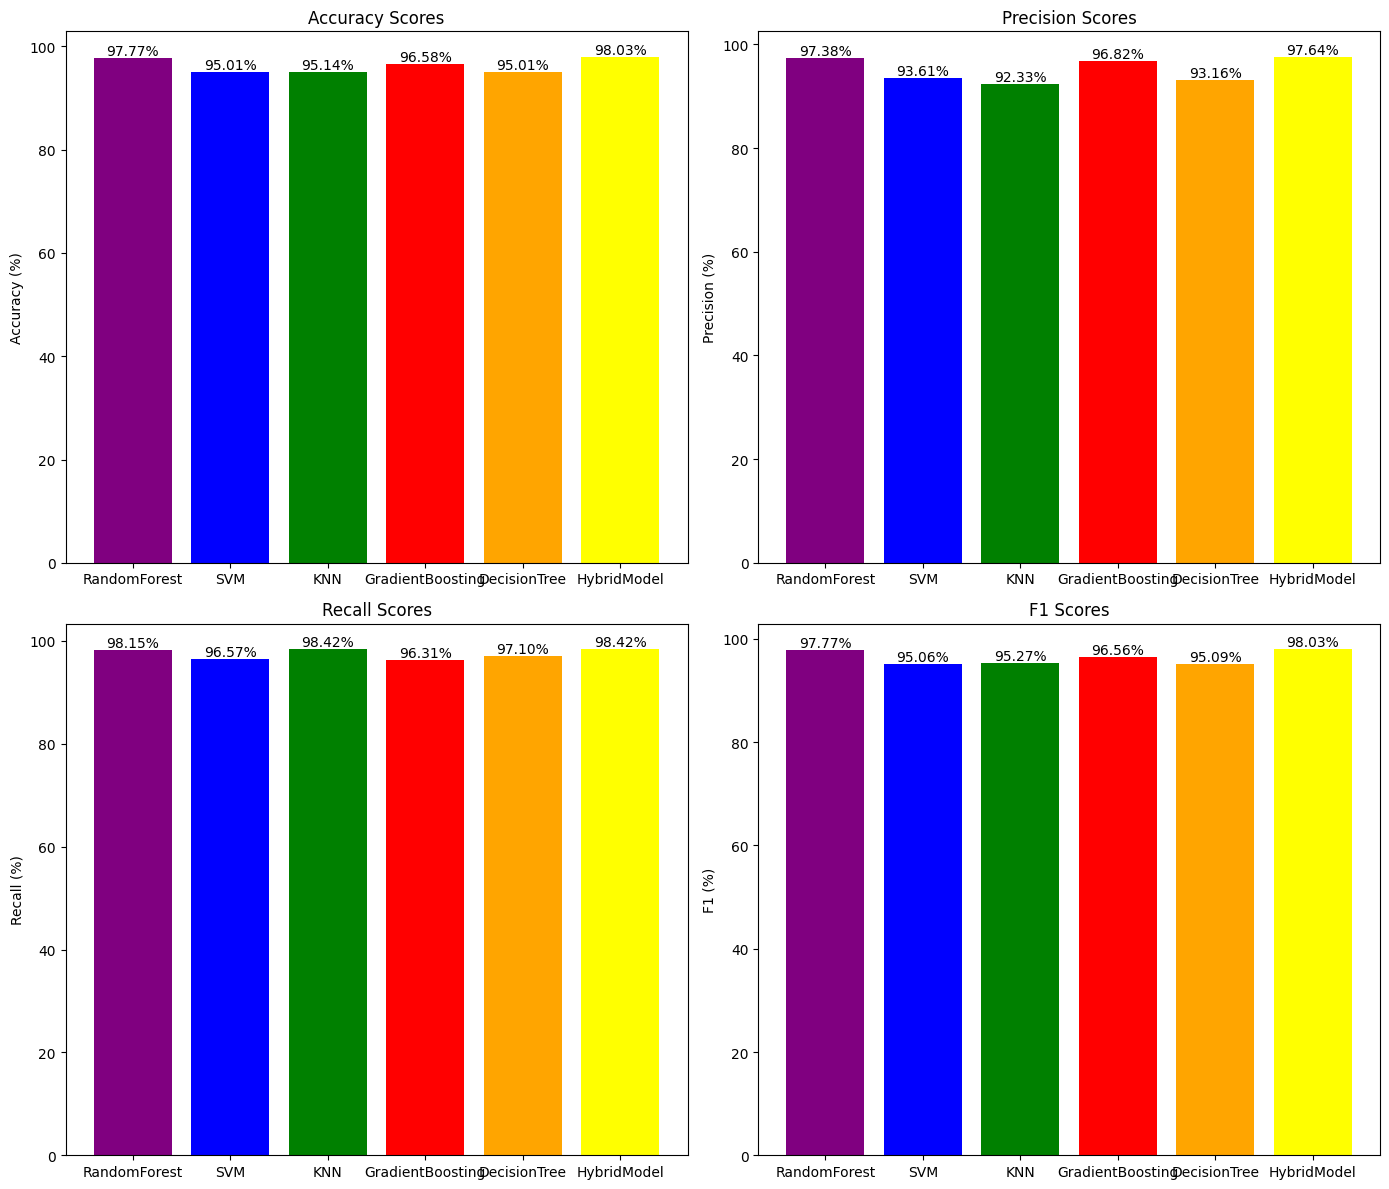

In [474]:
# Plotting the metrics
metrics = ['accuracy', 'precision', 'recall', 'f1']
fig, ax = plt.subplots(2, 2, figsize=(14, 12))

for i, metric in enumerate(metrics):
    values = [results[model][metric] for model in results.keys()]
    bars = ax[i//2, i%2].bar(results.keys(), values, color=['purple', 'blue', 'green', 'red', 'orange', 'yellow'])

    ax[i//2, i%2].set_title(f'{metric.capitalize()} Scores')
    ax[i//2, i%2].set_ylabel(f'{metric.capitalize()} (%)')

    # Adding the value labels on the bars
    for bar in bars:
        height = bar.get_height()
        ax[i//2, i%2].text(
            bar.get_x() + bar.get_width() / 2,
            height,
            f'{height:.2f}%',
            ha='center',
            va='bottom'
        )

plt.tight_layout()
plt.show()


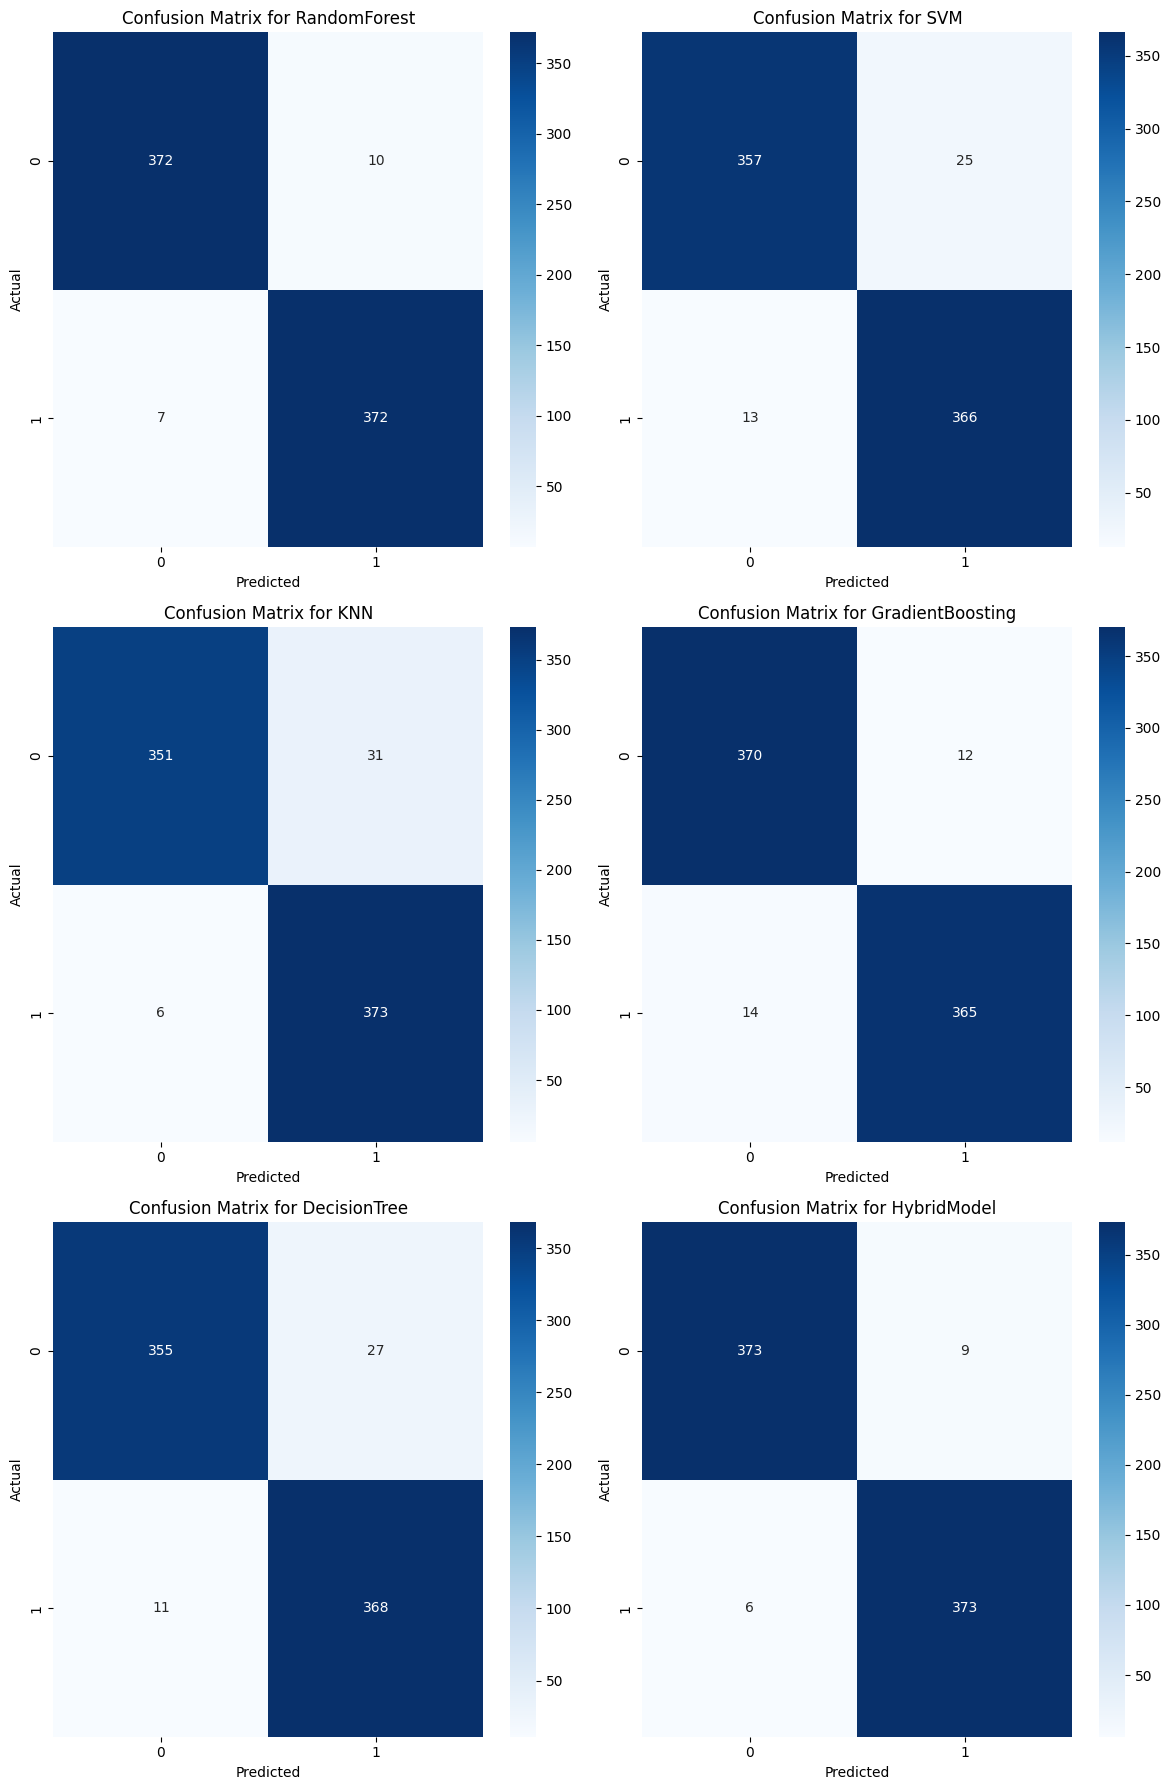

In [475]:
# Plotting the confusion matrices
fig, ax = plt.subplots(3, 2, figsize=(12, 18))
for i, model in enumerate(results.keys()):
    if i >= 6: break  # Ensure we don't exceed the number of subplots
    cm = np.array([[results[model]['tn'], results[model]['fp']], [results[model]['fn'], results[model]['tp']]])
    sns.heatmap(cm, annot=True, fmt='d', ax=ax[i//2, i%2], cmap='Blues')
    ax[i//2, i%2].set_title(f'Confusion Matrix for {model}')
    ax[i//2, i%2].set_xlabel('Predicted')
    ax[i//2, i%2].set_ylabel('Actual')

plt.tight_layout()
plt.show()


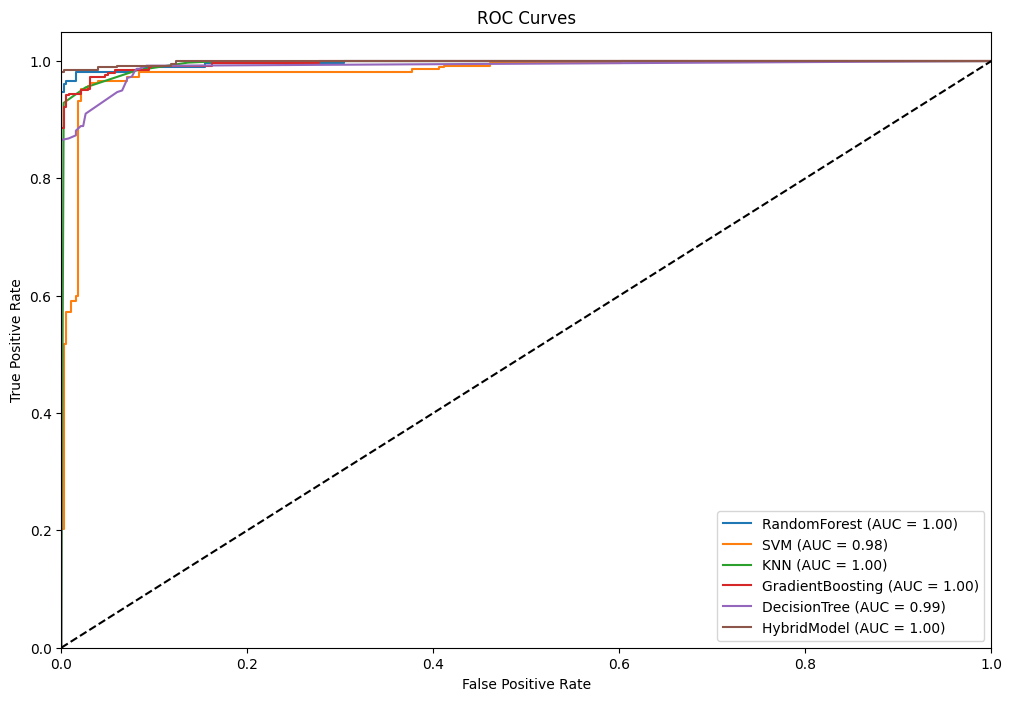

In [476]:
# Plotting the ROC curves
fig, ax = plt.subplots(figsize=(12, 8))

for model in results.keys():
    ax.plot(results[model]['fpr'], results[model]['tpr'], label=f'{model} (AUC = {results[model]["roc_auc"]:.2f})')

ax.plot([0, 1], [0, 1], 'k--')
ax.set_xlim([0.0, 1.0])
ax.set_ylim([0.0, 1.05])
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title('ROC Curves')
ax.legend(loc='lower right')
plt.show()